# Level calculation for Escape Game

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import decimal
import sys
import sklearn
from sklearn.utils import shuffle
from sklearn import linear_model
%matplotlib inline

## Importeren van data

Data is de array dat van de applicatie zal komen en waarvan het juiste level berekend zal worden. 
Daarna gaat voor elk opgave het level worden toegevoegd

In [ ]:
data=[{'gameDataId':4,'duration':120},{'gameDataId':2,'duration':120}]
maxLevel=10

In [3]:
# Inladen van de data
df =pd.read_csv('test_data/games.csv')
df.sort_values('gameDataId', axis=0, ascending=True,inplace=True)

df.head()


,gameDataId,timeBetween,percentSpeed,timePlayed,tries,isCorrect,level,gameId,id,activateDate,endDate,finishDate,isActive,letter,date,activateDateFormat,endDateFormat,finishDateFormat,gameDuration
0,2,20,1,20,0,False,5,1,1,1484317625938,1484317645938,1484317645938,True,NaN,NaN,2017-01-13T14:27:05+00:00,2017-01-13T14:27:25+00:00,2017-01-13T14:27:25+00:00,176
48,2,20,1,20,0,False,5,9,1,1484317625938,1484317645938,1484317645938,True,NaN,NaN,2017-01-13T14:27:05+00:00,2017-01-13T14:27:25+00:00,2017-01-13T14:27:25+00:00,120
24,2,20,1,20,0,False,5,5,1,1484317625938,1484317645938,1484317645938,True,NaN,NaN,2017-01-13T14:27:05+00:00,2017-01-13T14:27:25+00:00,2017-01-13T14:27:25+00:00,120
54,2,20,1,20,0,False,5,10,1,1484317625938,1484317645938,1484317645938,True,NaN,NaN,2017-01-13T14:27:05+00:00,2017-01-13T14:27:25+00:00,2017-01-13T14:27:25+00:00,120
30,2,20,1,20,0,False,5,6,1,1484317625938,1484317645938,1484317645938,True,NaN,NaN,2017-01-13T14:27:05+00:00,2017-01-13T14:27:25+00:00,2017-01-13T14:27:25+00:00,120


In [4]:
#df=df.drop(df.columns[[1,2,5,7,8,9,10,11,12,13,14,15,16]], axis=1)
sequence = ['gameDataId','gameDuration','level']
df = df.reindex(columns=sequence)
df.head()

,gameDataId,gameDuration,level
0,2,176,5
48,2,120,5
24,2,120,5
54,2,120,5
30,2,120,5


In [5]:
df.corr()

,gameDataId,gameDuration,level
gameDataId,1.000000e+00,1.978131e-17,-6.573757e-01
gameDuration,1.978131e-17,1.000000e+00,1.182159e-17
level,-6.573757e-01,1.182159e-17,1.000000e+00


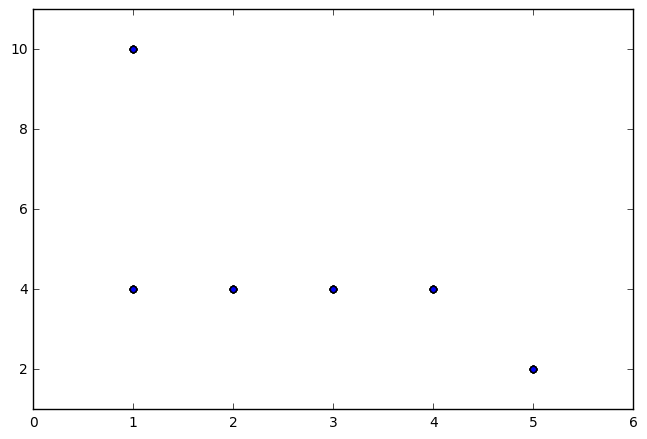

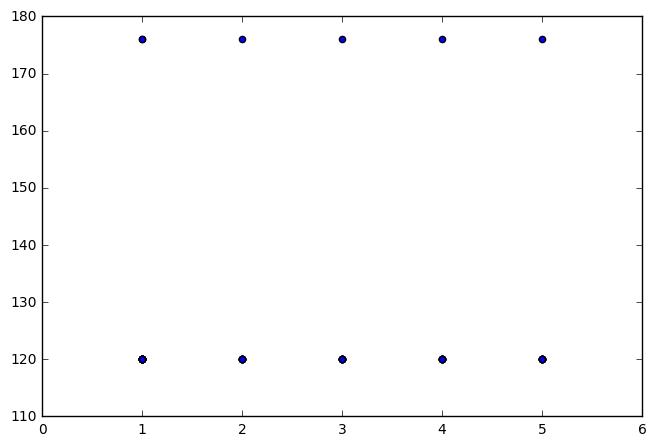

In [6]:
fig2=plt.figure();
ax1=fig2.add_axes([0,0,1,1])
ax1.scatter(df.level, df.gameDataId)

fig1=plt.figure();
ax1=fig1.add_axes([0,0,1,1])
ax1.scatter(df.level, df.gameDuration)

In [7]:
dfrnd = shuffle(df,random_state=0)

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import ShuffleSplit

features = dfrnd.ix[:,[0,1]].copy() #o tot en met 3
targets = dfrnd.ix[:,[2]].copy() # 4

X_train, X_test, Y_train, Y_test = train_test_split(features, targets, test_size=0.4, random_state=0)

#training en validatie

regr_ep = linear_model.LinearRegression()
regr_ep.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
score=regr_ep.score(X_test, Y_test) #--> vrij dicht bij 1 -> vrij goede correlatie
print(score)

0.443553657775


In [10]:
print(val)
obj={}
obj['data']=val
obj['score']=score

[{'duration': 120, 'gameDataId': 4, 'level': 2}, {'duration': 120, 'gameDataId': 2, 'level': 3}]


In [15]:
val=[]
if len(data)>0:
    for x in data:
        if x['duration'] is not None and x['gameDataId'] is not None:
            item=regr_ep.predict([[x['gameDataId'],x['duration']]])
            if item<=maxLevel and item>0:
                rounded= math.ceil(item[0][0]*100)/100
                x['level']=int(rounded)
                print(x)

                val.append(x)
            else:
                print(item,'not ')



{'duration': 120, 'gameDataId': 4, 'level': 2}
{'duration': 120, 'gameDataId': 2, 'level': 3}


#### Wanneer dit gebeurd is zal val teruggestuurd worden naar de server en zal het juiste level ingeladen worden